In [3]:
import xarray as xr

Point to and load the data

## Making your own plots
Here are a few ideas for plots that you could try to make using the examples above as a starting point:
* Spatial maps of temperature for different
    * points in time (monthly, or longer term averages)
    * emissions
* Spatial maps of temperature *change* between two different time periods
    * global maps
    * regional maps
* Time-series data for different regions (e.g. Atlantic basin, Southern Ocean)
    * monthly mean and annual averages displayed on the same plot?
* Change in the monthly climatology over time
* The Hovmuller plots and vertical profiles shown in "What is a NetCDF file?"

# Spatial Maps

Simple plot using xarray.plot() -- SST in February 1950

In [7]:
# Specify the path to the data on flyingfish
rootdir = '/local/ss23/GFDL_LEs/'
# Specify which experiment you want to look at
experiment = 'RCP85'
# Specify the file name
filename = 'sst.1.rcp85.remap.1950_2100.nc'
# The combination of these defines the path
path = rootdir+experiment+'/'+filename

# Load the file using xarray
ds = xr.open_dataset(path)

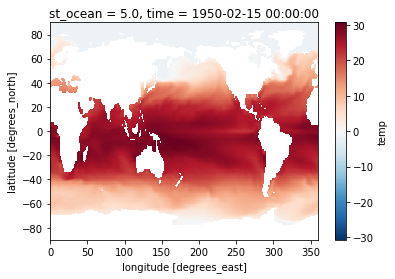

In [8]:
# 'temp' selects the temperature variable from the dataset ds
# .isel(time=0) selects the 0'th (in python indices start at 0) index of the data along the time dimension
# alternatively, .sel(time='1950-02-15') uses a specified time format
temp1 = (ds['temp']-273.15).sel(time='1950-02-15').plot()

In [9]:
# Can print timestamps to find individual dates (or take slice by time index)
print(ds['temp'].time[:10])

<xarray.DataArray 'time' (time: 10)>
array([cftime.DatetimeNoLeap(1950-01-16 12:00:00),
       cftime.DatetimeNoLeap(1950-02-15 00:00:00),
       cftime.DatetimeNoLeap(1950-03-16 12:00:00),
       cftime.DatetimeNoLeap(1950-04-16 00:00:00),
       cftime.DatetimeNoLeap(1950-05-16 12:00:00),
       cftime.DatetimeNoLeap(1950-06-16 00:00:00),
       cftime.DatetimeNoLeap(1950-07-16 12:00:00),
       cftime.DatetimeNoLeap(1950-08-16 12:00:00),
       cftime.DatetimeNoLeap(1950-09-16 00:00:00),
       cftime.DatetimeNoLeap(1950-10-16 12:00:00)], dtype=object)
Coordinates:
  * time     (time) object 1950-01-16 12:00:00 ... 1950-10-16 12:00:00
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T


In [1]:
# Import the packages that I want
from matplotlib import pyplot as plt
from matplotlib import gridspec
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

## Spatial Map of Temperature for Different Points in Time

In [4]:
# Specify the path to the data on flyingfish
rootdir = '/local/ss23/GFDL_LEs/'
# Specify which experiment you want to look at
experiment = 'RCP85'
# Specify the file name
filename = 'sst.1.rcp85.remap.1950_2100.nc'
# The combination of these defines the path
path = rootdir+experiment+'/'+filename

# Load the file using xarray
ds = xr.open_dataset(path)

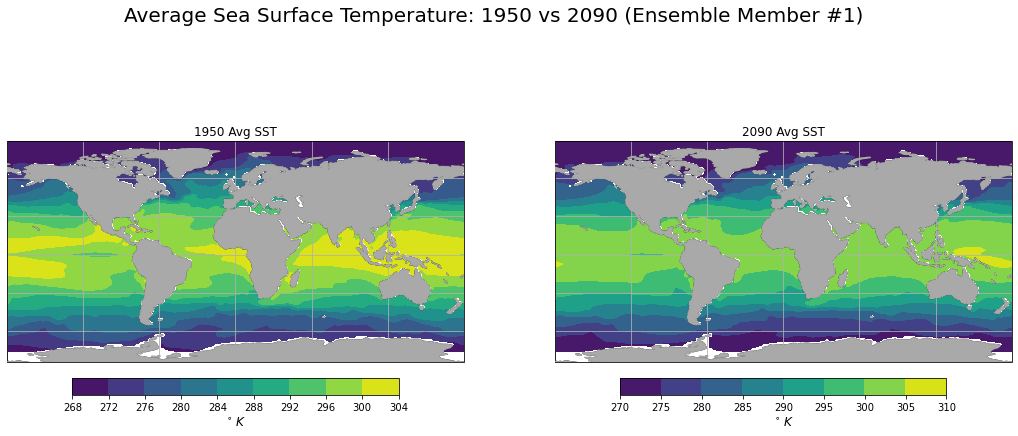

In [12]:
# Specify the map projection
crs = ccrs.PlateCarree(central_longitude=0)

# Create a figure and axes using matplotlib
# (simultaneously create figure with one subplot axes)
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=2, subplot_kw={'projection':crs})

# Can use GridSpec object to format subplots
# spec = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

# Specify the longitude and latitude, and the variable that you wish to plot
X = ds['xt_ocean']
Y = ds['yt_ocean']

# First plot: Mean Temperature in 1950
year = ds['temp'].sel(time='1950').squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions
Z0 = year.groupby('time.year').mean().squeeze()

# Second plot: Mean Temperature in 2100
year = ds['temp'].sel(time='2090').squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions
Z1 = year.groupby('time.year').mean().squeeze()

# To overcome an issue with the discontinous nature of data in the x-dimension
X0 = X
Z0,X0 = add_cyclic_point(Z0, coord=X0)

X1 = X
Z1,X1 = add_cyclic_point(Z1, coord=X1)

# Create contour plot of SST
im0 = axs[0].contourf(X0,Y,Z0, transform=crs)

# Create contour plots of SST
im1 = axs[1].contourf(X1,Y,Z1, transform=crs)


# Add a land mask to your plot, as well as grid lines and coastlines
for ax in axs:
    # ax.set_aspect('equal', 'box')
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='darkgrey')
    ax.gridlines()
    ax.coastlines()
    

# Give your plot a title
fig.suptitle('Average Sea Surface Temperature: 1950 vs 2090 (Ensemble Member #1)', va='bottom', fontsize=20)
axs[0].set_title('1950 Avg SST')
axs[1].set_title('2090 Avg SST')

# Finally, add colorbars
# fraction --> fraction of original axes to use for colorbar
# pad --> 0.05 if vertical, 0.15 if horizontal; fraction of original axes between 
# colorbar and new image axes
cbar0 = plt.colorbar(im0, ax=axs[0], orientation='horizontal', fraction=0.05, pad=0.05)
cbar0.set_label('$^\circ\,K$',fontsize=12)
cbar1 = plt.colorbar(im1, ax=axs[1], orientation='horizontal', fraction=0.05, pad=0.05)
cbar1.set_label('$^\circ\,K$',fontsize=12)

## Spatial Map of Temperature for Different Emissions

In [14]:
# Specify which experiment you want to look at
experiment = 'RCP26'
# Specify the file name
filename = 'sst.1.rcp26.remap.1950_2100.nc'
# The combination of these defines the path
path = rootdir+experiment+'/'+filename

# Load the file using xarray
ds0 = xr.open_dataset(path)

experiment = 'RCP85'
filename = 'sst.1.rcp85.remap.1950_2100.nc'
path = rootdir+experiment+'/'+filename

# Load the file using xarray
ds1 = xr.open_dataset(path)

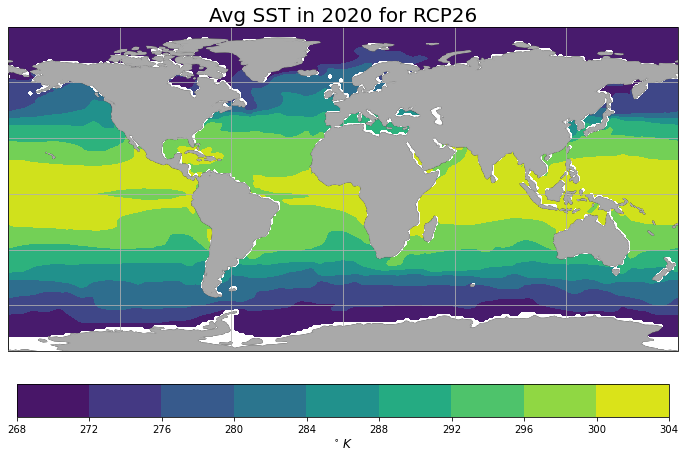

In [21]:
# Specify the map projection
crs = ccrs.PlateCarree(central_longitude=0)

fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'projection':crs})

# Specify the longitude and latitude, and the variable that you wish to plot
X = ds['xt_ocean']
Y = ds['yt_ocean']

# First plot: Mean Temperature in 1950
year = ds['temp'].sel(time='2020').squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions
Z = year.groupby('time.year').mean().squeeze()

# To overcome an issue with the discontinous nature of data in the x-dimension
Z,X = add_cyclic_point(Z, coord=X)

# Create contour plot of SST
im = ax.contourf(X,Y,Z, transform=crs)

# Add a land mask to your plot, as well as grid lines and coastlines
ax.add_feature(cfeature.LAND, zorder=10, facecolor='darkgrey')
ax.gridlines()
ax.coastlines()


ax.set_title('Avg SST in 2020 for RCP26', fontsize=20)

# Finally, add colorbars
cbar = plt.colorbar(im0, ax=ax, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('$^\circ\,K$',fontsize=12)

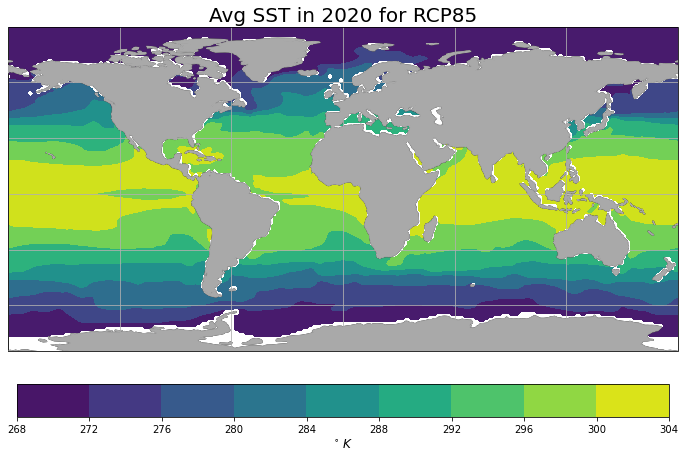

In [16]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'projection':crs})

# Specify the longitude and latitude, and the variable that you wish to plot
X = ds['xt_ocean']
Y = ds['yt_ocean']

# First plot: Mean Temperature in 1950
year = ds['temp'].sel(time='2020').squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions
Z = year.groupby('time.year').mean().squeeze()

# To overcome an issue with the discontinous nature of data in the x-dimension
Z,X = add_cyclic_point(Z, coord=X)

# Create contour plot of SST
im = ax.contourf(X,Y,Z, transform=crs)

# Add a land mask to your plot, as well as grid lines and coastlines
ax.add_feature(cfeature.LAND, zorder=10, facecolor='darkgrey')
ax.gridlines()
ax.coastlines()

ax.set_title('Avg SST in 2020 for RCP85', fontsize=20)

cbar = plt.colorbar(im0, ax=ax, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('$^\circ\,K$',fontsize=12)

## Temperature Change Between Different Time Periods